<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** A neuron takes inputs and fires an output if the weighted sum of the input meets the activation threshold

- **Input Layer:** Input layer is the layer of a neural network that directly interfaces with the input to the network.

- **Hidden Layer:** Hidden layers are the layers of a neural network that neither the input or output have direct access to.

- **Output Layer:** Output layer is the layer of a neural network that directly interfaces with the outputs of the network.

- **Activation:** Activation is the function of a perceptron that takes weighted inputs of a perceptron and determines what should be the output. Common activation functions includes sigmoid, tanh, ReLU, leakyReLU, etc.

- **Backpropagation:** Back propogation is one of the algorithms that is used to update the weights/parameters of neural networks. First, inputs are processed through a forward step and produce an output. That output is differenced against the expected target output. The differences are then back propogated to find attributions from weights and biases parameters. Update the parameters and go through the steps until it converges to a solution.


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
import pandas as pd
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [2]:
print(candy.shape)
candy.head()

(10000, 3)


,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. Explain why you could not achieve a higher accuracy with a *simple perceptron*. It's possible to achieve ~95% accuracy on this dataset.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,
                                                 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [14]:
weights = 2*np.random.random((2, 1)) - 1

In [17]:
for iteration in range(10000):
    
    #weighted sum of inputs / weights
    weighted_sum = np.dot(X_train, weights)
    
    #activate
    activated_output = sigmoid(weighted_sum)
    
    #cac error
    error = y_train - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    #update the weights
    
    weights += np.dot(X_train.T, adjustments)
    
print("weights after training")
print(weights)
    
print("output after training")
print(activated_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


weights after training
[[-316.45971145]
 [-158.72278313]]
output after training
[[0.5]
 [1. ]
 [1. ]
 ...
 [1. ]
 [1. ]
 [0.5]]


In [18]:
activated_output[activated_output < .5] = 0
activated_output[activated_output >= .5] = 1

In [19]:
print("accuracy:", accuracy_score(activated_output, y_train))

accuracy: 0.5025


Simple perceptrons do not utilize feed forward and back propagation, which limits them to only learning linearly separable patterns. 

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [22]:
class NeuralNetwork: 
    def __init__(self):
        # Set up Architecture 
        self.inputs = 2
        self.hiddenNodes = 8
        self.outputNodes = 1
        
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return np.exp(-s)/((1+np.exp(-s))**2)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        #Weighted sume of inputs and hidden layer
        self.h2 = np.dot(X, self.weights1)
        
        #Acivations of weighted sum
        self.a2 = self.sigmoid(self.h2)
        
        # Weight sum between hidden and output
        self.h3 = np.dot(self.a2, self.weights2)
        
        #Final activation of output
        self.a3 = self.sigmoid(self.h3)
        
        return self.a3
    
    def backward(self, X, y, o, learning_rate=0.1):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = learning_rate*(self.o_error * self.sigmoidPrime(o)) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.a2)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.a2.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y, learning_rate=0.01):
        for _ in range(10000):
            o = self.feed_forward(X)
            self.backward(X, y, o, learning_rate=learning_rate)
        self.loss = np.mean(np.square(y-self.feed_forward(X)))
        print("Loss: " + str(self.loss))
        
    def predict(self, X, y):
        preds = self.feed_forward(X)
        
        preds[preds < .5] = 0
        preds[preds >= .5] = 1
        
        print("Accuracy:", accuracy_score(y, preds))
        

In [23]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [24]:
nn = NeuralNetwork()

nn.train(X_train, y_train)

nn.predict(X_test, y_test)

Loss: 0.20073220120943674
Accuracy: 0.946


With backpropagation, the weights are updated in reverse order to minimize loss. Combining weights into the input contributes to the output, so minimizing the error associated with weights helps with better accuracy. They can also account for non-linear patterns.

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [17]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


In [5]:
# Scale values
x = df.values 
min_max_scaler = StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Split values into x and y components
X_train, X_test, y_train, y_test = train_test_split(x_scaled[:, :-1], x_scaled[:, -1], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [22]:
# Baseline Model
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(inputs)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, validation_split=0.20, epochs=10, verbose=False)

In [9]:
scores = model.evaluate(X_test, y_test, verbose=False)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

accuracy: 0.0


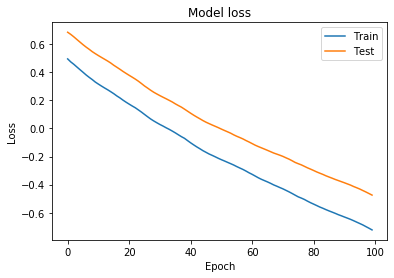

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show();

In [30]:
inputs = X_train.shape[1]

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [16, 32, 64]
epochs = [20, 80]

# define the grid search parameters
param_grid = dict(
                  batch_size=batch_size,
                  epochs=epochs
                )

# Create Grid Search
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=3)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8595041300147033 using {'batch_size': 32, 'epochs': 80}
Means: 0.8512396736085908, Stdev: 0.03459863708372117 with: {'batch_size': 16, 'epochs': 20}
Means: 0.8388429744677111, Stdev: 0.027400996599243277 with: {'batch_size': 16, 'epochs': 80}
Means: 0.8305785104262927, Stdev: 0.030188114360189464 with: {'batch_size': 32, 'epochs': 20}
Means: 0.8595041300147033, Stdev: 0.03201150516339827 with: {'batch_size': 32, 'epochs': 80}
Means: 0.8512396721307897, Stdev: 0.03587449853312993 with: {'batch_size': 64, 'epochs': 20}
Means: 0.8512396750863919, Stdev: 0.009387370432712922 with: {'batch_size': 64, 'epochs': 80}


In [31]:
print(f'Best params: {grid_result.best_params_}, Best score: {grid_result.best_score_}')

Best params: {'batch_size': 32, 'epochs': 80}, Best score: 0.8595041300147033


## Stretch Goal

In [36]:
# Incorporating best params into model
def create_model(init_mode, momentum, optimizer):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=32, epochs=80, verbose=0)

# Fine-tuning 3 more parameters
init_mode = ['normal', 'he_normal']
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


# define the grid search parameters
param_grid = dict(
                  init_mode=init_mode,
                  momentum=momentum,
                  optimizer=optimizer
                )

# Create Grid Search
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=3)

grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")


Best: 0.8636363818625773 using {'init_mode': 'he_normal', 'momentum': 0.2, 'optimizer': 'Adamax'}
Means: 0.847107446144435, Stdev: 0.01479978983247294 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'SGD'}
Means: 0.851239676564193, Stdev: 0.01013852353280649 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'RMSprop'}
Means: 0.8595041529206205, Stdev: 0.00547172314189714 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'Adagrad'}
Means: 0.8471074446666339, Stdev: 0.04042360178874821 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'Adadelta'}
Means: 0.8512396750863919, Stdev: 0.009387370432712922 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'Adam'}
Means: 0.83884297298991, Stdev: 0.018005557528859278 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'Adamax'}
Means: 0.8429752004540656, Stdev: 0.015632429986491916 with: {'init_mode': 'normal', 'momentum': 0.0, 'optimizer': 'Nadam'}
Means: 0.8305785165837973, Stdev: 0.0

In [37]:
print(f'Best params: {grid_result.best_params_}, Best score: {grid_result.best_score_}')

Best params: {'init_mode': 'he_normal', 'momentum': 0.2, 'optimizer': 'Adamax'}, Best score: 0.8636363818625773
